In [4]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time

spotify_data = pd.read_csv('spotify_dataset.csv')

spotify_data.sample(20)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
36994,36994,5YKyEOXInpfadidKHIxPAs,Shaka Ponk,Apelogies,Smells Like Teen Spirit - 2020,31,331906,False,0.294,0.678,...,-4.286,0,0.0518,0.055200,0.000005,0.1040,0.16000,94.881,4,french
108827,108827,79mbq9PamZiNAUBM8HFjSm,Aníbal Troilo Y Su Orquesta Típica;Roberto Goy...,Tinta Roja 1971,Tinta Roja (with Roberto Goyeneche),16,178866,False,0.483,0.456,...,-6.482,1,0.0427,0.676000,0.000000,0.1360,0.50900,58.628,4,tango
75393,75393,0lGDKpRAl9y7NfrxP1Y8uo,Tony O'Connor,Kakadu,Gagadju Life Force,24,432240,False,0.379,0.105,...,-18.509,1,0.0359,0.980000,0.859000,0.1050,0.11400,124.956,4,new-age
14505,14505,2Va8eZGeFZuHNqRtmJ2x3C,CoComelon,"CoComelon Kids Hits, Vol. 4",Dinosaur Song,51,184617,False,0.899,0.369,...,-11.041,1,0.0358,0.495000,0.000002,0.1030,0.81100,130.042,4,children
112043,112043,5ol1YlrXJABoBwbZ4tNfQt,Teoman,Viral Şarkılar,Gemiler,0,260466,False,0.555,0.742,...,-7.554,0,0.0419,0.077300,0.000001,0.0457,0.37900,80.048,4,turkish
97101,97101,23eLpLRI1NZejKSQfxHGfw,Gabriel Diniz;Jorge & Mateus,Paraquedas,Paraquedas,54,168426,False,0.589,0.937,...,-2.332,1,0.0383,0.652000,0.000000,0.1790,0.80900,171.033,4,sertanejo
101972,101972,0zoh2CMrXK1LtHD38McuxR,Binaural Beats;White Noise Babies;Binaural Bea...,Airconditioner Noise,Nap in the Afternoon Box Fan,32,60000,False,0.188,0.414,...,-43.943,0,0.0720,0.996000,0.998000,0.1030,0.00994,136.862,4,sleep
44326,44326,3KsatAMRt1a7iryhWt5I8U,Foo Fighters,Greatest Hits,Wheels,64,278213,False,0.426,0.792,...,-4.709,1,0.0374,0.000495,0.000005,0.1420,0.55700,161.994,4,grunge
60960,60960,1yqrqitBnzO6jw2LCD1GY2,SWAY,チョコレート,チョコレート,19,194026,False,0.763,0.851,...,-4.862,1,0.0341,0.375000,0.000000,0.1350,0.92000,136.063,4,j-dance
81282,81282,3wwapjKCuyoonczLpxoBtR,Justin Bieber,Best Christmas Playlist Ever 2022,Mistletoe,0,183066,False,0.623,0.668,...,-7.282,0,0.0531,0.475000,0.000000,0.0862,0.82300,161.948,4,pop


In [5]:
spotify_data = spotify_data.drop(columns=['Unnamed: 0'])

Get shape of dataset (number of rows and cols)

In [6]:
spotify_data.shape

(114000, 20)

Get a summary of numeric columns

Observations:
- The min duration_ms of a song is ~0ms, which may be strange. Possible future to-do: remove songs that are 0ms long

In [7]:
spotify_data.select_dtypes('number').describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Find any duplicate rows from the dataset

In [8]:
duplicate_mask = spotify_data.duplicated(keep=False)

# Filter the dataframe to show only the duplicate rows
duplicate_rows = spotify_data[duplicate_mask]

# Get the count of completely duplicate rows
num_duplicates = len(duplicate_rows)
print(f"Number of rows that are duplicates/Number of total rows: {num_duplicates}/{spotify_data.shape[0]}")

# Sort the duplicate rows by all columns to group identical rows together
duplicate_rows_sorted = duplicate_rows.sort_values(spotify_data.columns.tolist())

duplicate_rows_sorted

Number of rows that are duplicates/Number of total rows: 894/114000


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
52714,00JZ83w0Qm09f4PwWj06sM,George Jones,With Love,A Good Year For The Roses,12,190546,False,0.491,0.334,11,-9.684,1,0.0287,0.659,0.000016,0.1160,0.2490,91.674,4,honky-tonk
52766,00JZ83w0Qm09f4PwWj06sM,George Jones,With Love,A Good Year For The Roses,12,190546,False,0.491,0.334,11,-9.684,1,0.0287,0.659,0.000016,0.1160,0.2490,91.674,4,honky-tonk
39275,02KmEChUwcjxG3G29kbLFT,Hans Zimmer;Henning Lohner;Martin Tillman;Fiac...,Hans Zimmer: Epic Scores,Shelter Mountain,16,250520,False,0.144,0.262,9,-21.228,1,0.0641,0.876,0.755000,0.1440,0.0345,94.430,4,german
39307,02KmEChUwcjxG3G29kbLFT,Hans Zimmer;Henning Lohner;Martin Tillman;Fiac...,Hans Zimmer: Epic Scores,Shelter Mountain,16,250520,False,0.144,0.262,9,-21.228,1,0.0641,0.876,0.755000,0.1440,0.0345,94.430,4,german
93331,02MRylJ1WAgxzdqfNfdIsR,Oleg Pogudin,Любовь и разлука. Песни Исаака Шварца,"Город пышный, город бедный",0,114600,False,0.446,0.121,4,-12.737,0,0.0414,0.937,0.000000,0.1250,0.1800,107.573,3,romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52570,7zBY3YjvcdkpbHIUx0fe5Q,Hank Williams,Hank Williams As Luke The Drifter (Expanded Ed...,Everything's Okay,12,172026,False,0.607,0.378,7,-13.581,1,0.1480,0.837,0.000000,0.0752,0.8700,73.728,4,honky-tonk
93290,7zkgAyL3DS6PE5FWzk3QKM,Vladimir Nechaev,Душевные песни из советских кинофильмов,"Ты рядом со мной - Из к/ф ""Наши соседи""",1,207438,False,0.336,0.315,2,-10.006,0,0.0312,0.875,0.000004,0.4260,0.4540,147.996,3,romance
93328,7zkgAyL3DS6PE5FWzk3QKM,Vladimir Nechaev,Душевные песни из советских кинофильмов,"Ты рядом со мной - Из к/ф ""Наши соседи""",1,207438,False,0.336,0.315,2,-10.006,0,0.0312,0.875,0.000004,0.4260,0.4540,147.996,3,romance
16719,7zo05whm8LBnnt1dG979ov,Wolfgang Amadeus Mozart;Wiener Mozart Ensemble...,Mozart - A Classical Dawn,"Six German Dances, K.571: No. 5 in B Flat Major",3,92000,False,0.539,0.158,10,-15.544,1,0.0356,0.976,0.498000,0.1510,0.6850,88.180,3,classical


Drop duplicate rows

In [9]:
spotify_data_unique = spotify_data.drop_duplicates()

num_unique = len(spotify_data_unique)
print(f"Number of unique rows: {num_unique}")

Number of unique rows: 113550


Check if `track_id` is a unique identifier column for the dataset

In [10]:
duplicate_mask = spotify_data_unique['track_id'].duplicated(keep=False)

# Filter the dataframe to show only rows with duplicate track_ids
duplicate_rows = spotify_data_unique[duplicate_mask]

# Sort the result by track_id to group duplicates together
duplicate_rows_sorted = duplicate_rows.sort_values('track_id')

# Get the count of duplicate rows
print(f"Number of rows with duplicate track_ids: {len(duplicate_rows)}")
duplicate_rows_sorted

Number of rows with duplicate track_ids: 40108


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15028,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,chill
103211,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,soul
85578,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,punk-rock
100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,ska
2106,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,4,alt-rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22326,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,death-metal
72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,metalcore
3100,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alternative
2004,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alt-rock


`track_id` has some duplicates. We can verify this by seeing if there are more rows than unique `track_ids`

In [11]:
unique_track_ids = spotify_data_unique["track_id"].unique()
rows_unique_track_id_ratio = spotify_data_unique.shape[0]/len(unique_track_ids)

print(f"Number of rows: {spotify_data_unique.shape[0]}")
print(f"Number of unique track ids: {len(unique_track_ids)}")
print(f"Number of rows divided by number of unique track ids: {rows_unique_track_id_ratio}")

Number of rows: 113550
Number of unique track ids: 89741
Number of rows divided by number of unique track ids: 1.2653079417434618


Observations:
- The rows with the same `track_id` have identical entries, except the `track_genre` column at the end.
- Since `track_id` is not a unique identifier we can combine `track_id` and `track_genre`, separated by ":" to form a unique identifier called `unique_id` (e.g. `7zwn1eykZtZ5LODrf7c0tS:rock`)

In [12]:
spotify_data_unique['unique_id'] = spotify_data_unique['track_id'] + ':' + spotify_data_unique['track_genre']

<ipython-input-12-a474d2b387ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_unique['unique_id'] = spotify_data_unique['track_id'] + ':' + spotify_data_unique['track_genre']


Now check for any duplicates in `unique_id`. Ideally, there should be none.

In [13]:
# Check if number of rows equals number of unique_id entries
unique_ids = spotify_data_unique["unique_id"].unique()
rows_unique_id_ratio = spotify_data_unique.shape[0]/len(unique_ids)

print(f"Number of rows: {spotify_data_unique.shape[0]}")
print(f"Number of unique ids: {len(unique_ids)}")
print(f"Number of rows divided by number of unique ids: {rows_unique_id_ratio}")


# Check for any duplicate unique ids
duplicate_mask = spotify_data_unique['unique_id'].duplicated(keep=False)
duplicate_rows = spotify_data_unique[duplicate_mask]
duplicate_rows_sorted = duplicate_rows.sort_values('unique_id')
print(f"\nNumber of rows with duplicate unique_id: {len(duplicate_rows)}")

Number of rows: 113550
Number of unique ids: 113550
Number of rows divided by number of unique ids: 1.0

Number of rows with duplicate unique_id: 0


Now that we have unique identifiers, another step to look into is check for NA values

In [14]:
# Get the sum of all NA values for each column
na_values = spotify_data_unique.isna().sum()
na_values

,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


We see that there are some NA values in `artists` and `album_name` column. Find which observational units have these.

In [15]:
na_artists = spotify_data[spotify_data['artists'].isna()]
print(na_artists)

na_album_name = spotify_data[spotify_data['album_name'].isna()]
print(na_album_name)

                     track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop  
                     track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tem

From the results, we see only one observatoinal unit has the NA value, and the NA value is a categorical / string data type. Thus, it may not be best suited to create a imputation function to impute these two NA variables because there is no "mean", "mode", etc for them. Instead, we can simply remove this single NA row in hopes the dataset results will not be too skewed by this removal.

This observational unit also has a `duration_ms` of 0ms which is also strange. Thus, it is best to remove this unit from our dataset.

In [16]:
# Drop rows where either 'artists' or 'album_name' has NA values
spotify_data_cleaned = spotify_data_unique.dropna(subset=['artists', 'album_name'])

# Display the number of remaining rows and cols and check if any NA values remain in those columns
print(f"Number of rows and cols after removing NA valeus: {spotify_data_cleaned.shape}")

# Check that none of the columns contains NA values
spotify_data_cleaned.isna().sum() == 0


Number of rows and cols after removing NA valeus: (113549, 21)


,0
track_id,True
artists,True
album_name,True
track_name,True
popularity,True
duration_ms,True
explicit,True
danceability,True
energy,True
key,True


# Exploratory Data Analysis

In [17]:
import plotly.express as px

Remove all columns which contain non-numerical/categorical data

In [18]:
correlation_data = spotify_data_cleaned.select_dtypes('number')
correlation_data = correlation_data.drop(columns=['key', 'mode']) # Drop remaining categorical columns

Compute the correlation coefficient matrix for our chosen columns

In [19]:
correlation_mat = np.corrcoef(correlation_data, rowvar=False)
correlation_mat = np.flip(correlation_mat, axis=0)

correlation_heatmap = pd.DataFrame(correlation_mat, np.flip(correlation_data.columns), correlation_data.columns)
correlation_heatmap

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
time_signature,0.030567,0.018351,0.207370,0.186671,0.191648,-0.000397,-0.175621,-0.081951,-0.023902,0.133790,0.066900,1.000000
tempo,0.012187,0.024312,-0.051517,0.247361,0.212181,0.017167,-0.207620,-0.049939,0.000547,0.077640,1.000000,0.066900
valence,-0.041097,-0.154795,0.476755,0.258451,0.279428,0.036393,-0.106240,-0.324314,0.019339,1.000000,0.077640,0.133790
liveness,-0.005668,0.010199,-0.131651,0.184810,0.076792,0.205092,-0.020313,-0.079847,1.000000,0.019339,0.000547,-0.023902
instrumentalness,-0.094718,0.125301,-0.183974,-0.179967,-0.432109,-0.089214,0.102134,1.000000,-0.079847,-0.324314,-0.049939,-0.081951
acousticness,-0.022356,-0.103676,-0.169181,-0.732747,-0.588111,-0.001378,1.000000,0.102134,-0.020313,-0.106240,-0.207620,-0.175621
speechiness,-0.045463,-0.063194,0.108236,0.141976,0.060088,1.000000,-0.001378,-0.089214,0.205092,0.036393,0.017167,-0.000397
loudness,0.047368,-0.004233,0.256559,0.760624,1.000000,0.060088,-0.588111,-0.432109,0.076792,0.279428,0.212181,0.191648
energy,-0.002447,0.058160,0.131694,1.000000,0.760624,0.141976,-0.732747,-0.179967,0.184810,0.258451,0.247361,0.186671
danceability,0.034407,-0.074117,1.000000,0.131694,0.256559,0.108236,-0.169181,-0.183974,-0.131651,0.476755,-0.051517,0.207370


Now, we can visualize the correlation coefficients of our variables with a heatmap

In [20]:
px.imshow(correlation_heatmap, zmin=-1, zmax=1, color_continuous_scale=["Blue","White","Red"])

Scatter plot to show the relationship between Energy vs. Loudness and Energy vs. Acousticness

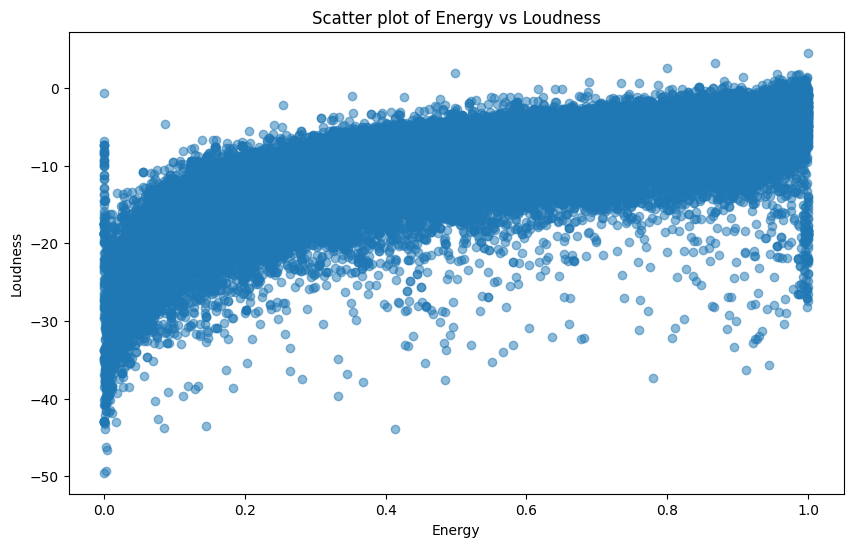

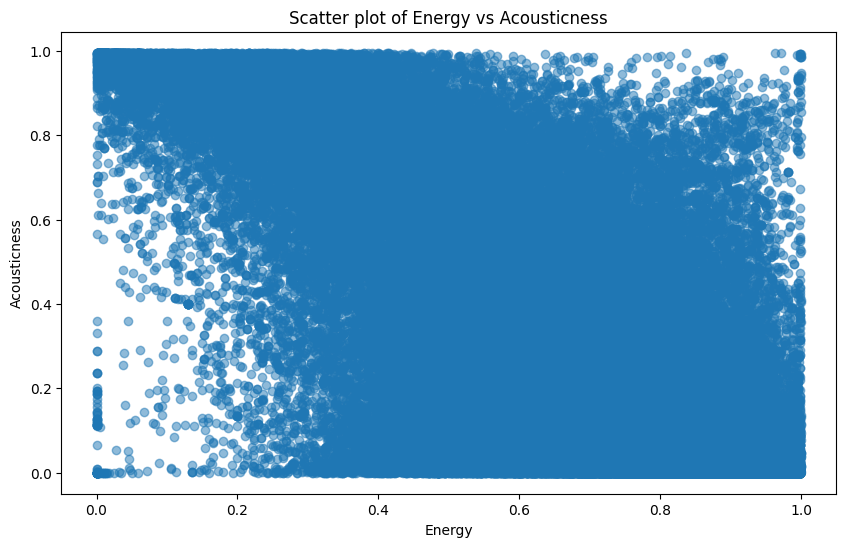

In [21]:
# Scatter plot for energy vs loudness
plt.figure(figsize=(10,6))
plt.scatter(spotify_data['energy'], spotify_data['loudness'], alpha=0.5)
plt.title('Scatter plot of Energy vs Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

# Scatter plot for energy vs acousticness
plt.figure(figsize=(10,6))
plt.scatter(spotify_data['energy'], spotify_data['acousticness'], alpha=0.5)
plt.title('Scatter plot of Energy vs Acousticness')
plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.show()

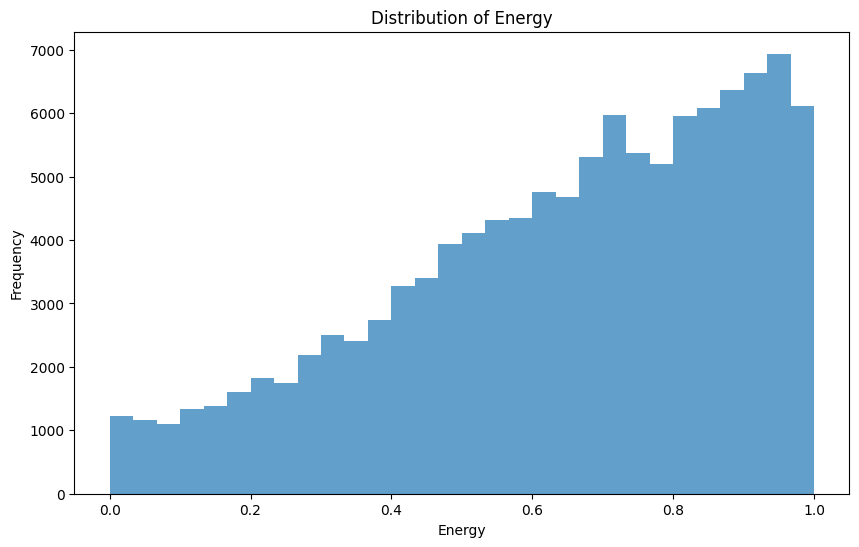

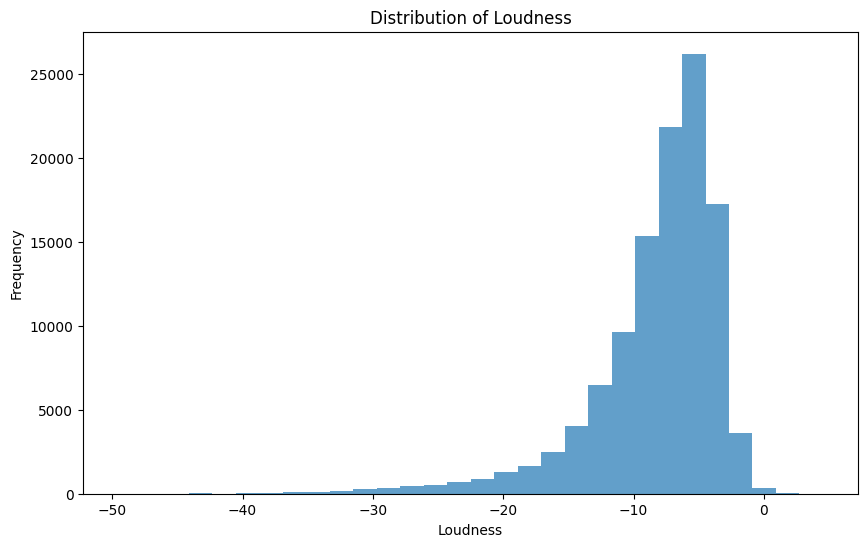

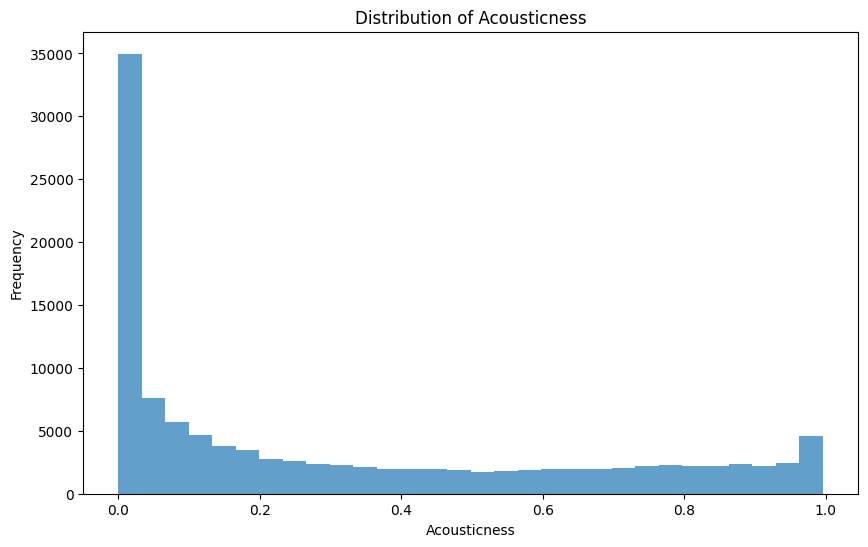

In [22]:
plt.figure(figsize=(10,6))
plt.hist(spotify_data['energy'], bins=30, alpha=0.7)
plt.title('Distribution of Energy')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()

# Histogram for Loudness
plt.figure(figsize=(10,6))
plt.hist(spotify_data['loudness'], bins=30, alpha=0.7)
plt.title('Distribution of Loudness')
plt.xlabel('Loudness')
plt.ylabel('Frequency')
plt.show()

# Histogram for Acousticness
plt.figure(figsize=(10,6))
plt.hist(spotify_data['acousticness'], bins=30, alpha=0.7)
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.show()